# Medical Data Visualizer with Matplotlib and Seaborn

<i>Nowadays, we all see the importance of medical data. The data was collected from variouse sources. This dataset was collected from a examination of a hospital. The rows in the dataset represent patients and the columns represent information like body measurements, results from various blood tests, and lifestyle choices. We will use the dataset to explore the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Fist, import the dataset and have a look of data's attributes

In [4]:
df = pd.read_csv("medical_examination.csv", index_col=0)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<i> BMI is a very fundamental index to see whether a body is overweight or not. So, let's calculate this index of those patients to determine whether they are overweight or not

In [5]:
df["BMI"] = round(df["weight"] / ((df["height"]/ 100) ** 2),1)

Next, create an attribute in the dataset to know whether a patient is overweight


In [7]:
overweight = []
for bmi in df["BMI"]:
    if bmi > 25:
        overweight.append(1)
    else:
        overweight.append(0)
df["overweight"] = overweight

In [8]:
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,22.0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.9,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.5,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.7,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.0,0


Glucose and cholesterol index are 2 types: normal (1) and above normal (2). <br> For the simplicity purpose, we will catagorize those indexes into 1 (normal) or 2 (not normal).


In [9]:
df["gluc"].replace([1,2,3],[0,1,1],inplace=True)
df["cholesterol"].replace([1,2,3],[0,1,1],inplace=True)

<i>As we already knew that Cario lifestyle is really important to help the body improve overall strength and flexibility. <br>In this dataset, we will visual data to see the interactions between cardio and overweight.

Convert the data into long format and create a chart that shows the value counts of the categorical 

In [11]:
df_melt = df.melt(id_vars="cardio",value_vars=["gluc","smoke","alco","active","cholesterol","overweight"])
df_melt_group = df_melt.groupby(["cardio", "variable", "value"], as_index= False).value_counts()

Using Seaborn to reveal the insight of the dataset.

<Figure size 640x480 with 0 Axes>

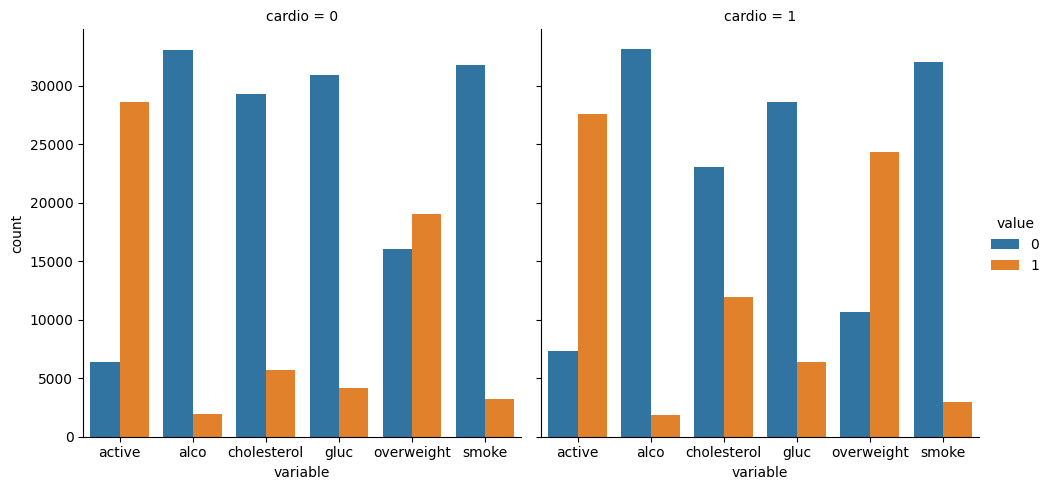

In [14]:
plt.figure()

fig = sns.catplot(data = df_melt_group, x="variable", y="count", col="cardio", hue="value", kind="bar")

plt.show()

<i> As you can see, in the chart Cardio value = 0, most of the attribute is equal in two groups except cholesterol, glucose, and overweight. In the Cardio = 0 chart, the number of patients who have those indexes normal 
are higher than cardio chart = 1. In contrast, patients who have those abnormal in the chart cardio = 1 is higher than the other chart.

Next, we clean the data. Filter out the following patient segments that represent incorrect data: <br>
- Diastolic pressure is higher than systolic. <br>
- Height is less than the 2.5th percentile.<br>
- Height is more than the 97.5th percentile.<br>
- Weight is less than the 2.5th percentile.<br>
- Weight is more than the 97.5th percentile

In [15]:
df_drop1 = df.drop(df[df["ap_hi"] < df["ap_lo"]].index)
df_drop1.drop(df_drop1[df_drop1["height"] < df["height"].quantile(0.025)].index, inplace= True)
df_drop1.drop(df_drop1[df_drop1["height"] > df["height"].quantile(0.975)].index, inplace= True)
df_drop1.drop(df_drop1[df_drop1["weight"] < df["weight"].quantile(0.025)].index, inplace= True)
df_drop1.drop(df_drop1[df_drop1["weight"] > df["weight"].quantile(0.975)].index, inplace= True)

<i> To see the correlation between those indexes, we will use a map to reveal the true pattern of this dataset.

In [18]:
df_drop2 = df_drop1.reset_index()
heat = df_drop2.corr()
matrix = np.triu(heat)

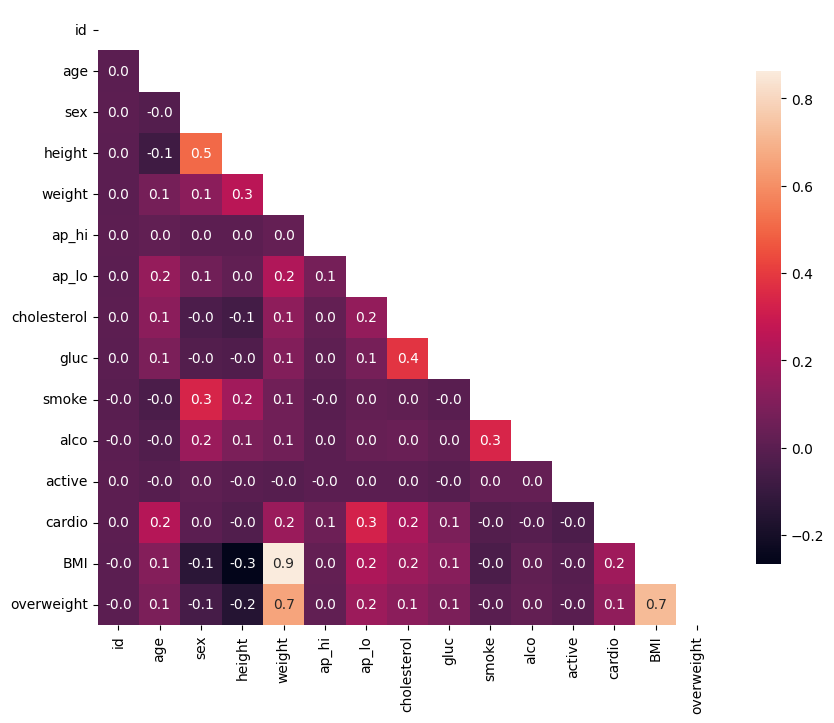

In [20]:
fig, ax = plt.subplots(figsize=(10,8))

ax1 = sns.heatmap(data = heat, mask = matrix, annot=True, fmt=".1f", cbar_kws={"shrink": 0.8})

plt.show()

<i> As the heatmap, we can see there are several correlation from this dataset:
- The correlation between BMI and weight, height, and overweight.
- Sex and smoke
- Cholesterol and Glucose
- Weight and height